#Data

Data yang digunakan merupakan data harga handphone yang dapat diakses melalui link berikut : https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [ ]:
import pandas as pd

df = pd.read_csv('./train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df['price_range'].value_counts().sort_values(ascending=False)

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

#Preprocessing

In [ ]:
#Memisahkan antara feature (x) dan label (y)
X = df.drop('price_range', axis=1)
y = df[['price_range']]

In [ ]:
X.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0


In [ ]:
y.head(4)

,price_range
0,1
1,2
2,2
3,2


In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X[0,:]

array([-0.90259726, -0.9900495 ,  0.83077942, -1.01918398, -0.76249466,
       -1.04396559, -1.38064353,  0.34073951,  1.34924881, -1.10197128,
       -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
        0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664])

In [ ]:
#proses selanjutnya yaitu melakukan one hot encoding terhadap y.
#One hot encoding adalah proses untuk mengubah kelas integer menjadi nilai biner
#contohnya jika kita memiliki 3 kelas, yaitu 1, 2 dan 3
#maka untuk 1 akan menjadi 1 0 0
#lalu untuk 2 akan menjadi 0 1 0
#dan untuk 3 akan menjadi  0 0 1

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print(y[:4])

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
#Proses pemisahan data menjadi training dan testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1800, 20) (1800, 4)
(200, 20) (200, 4)


#Model Deep Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [ ]:
model = Sequential() #Model
model.add(InputLayer(input_shape=(20,))) #Input Layer
model.add(Dense(16, activation='relu')) #Hidden Layer 1
model.add(Dense(16, activation='relu')) #Hidden Layer 2
model.add(Dense(8, activation='relu')) #Hidden Layer 3
model.add(Dense(4, activation='softmax')) #Output Layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.1, shuffle=True,
                    epochs=100)

Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 1.3954 - accuracy: 0.2864 - val_loss: 1.3410 - val_accuracy: 0.3278
Epoch 2/100
51/51 [==============================] - 0s 1ms/step - loss: 1.3027 - accuracy: 0.3574 - val_loss: 1.2570 - val_accuracy: 0.4111
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 1.2070 - accuracy: 0.4228 - val_loss: 1.1498 - val_accuracy: 0.4111
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 1.0792 - accuracy: 0.4809 - val_loss: 1.0156 - val_accuracy: 0.5278
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.9330 - accuracy: 0.5691 - val_loss: 0.8706 - val_accuracy: 0.6000
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7948 - accuracy: 0.6580 - val_loss: 0.7449 - val_accuracy: 0.6722
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7265 - val_loss: 0.6348 - val_accuracy: 0.7167
Epoch 8/100
5

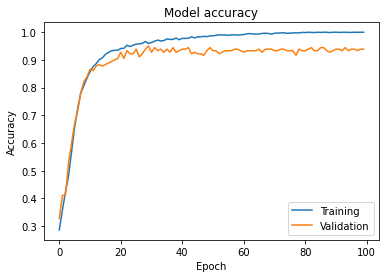

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

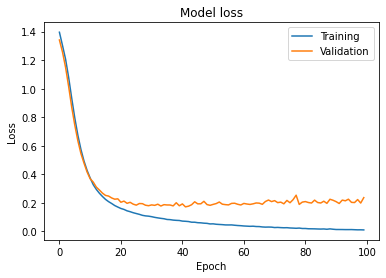

In [ ]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Predict

In [ ]:
y_pred = model.predict(X_test)
print(y_pred[0])
print(y_test[0])

[8.4149884e-17 1.2822893e-26 8.0931590e-05 9.9991906e-01]
[0. 0. 0. 1.]


In [ ]:
import numpy as np

print(np.argmax(y_pred[0]))
print(np.argmax(y_test[0]))

3
3


In [ ]:
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

print(pred[:4])
print(test[:4])

[3, 0, 2, 2]
[3, 0, 2, 2]


#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test,pred)

0.895

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test,pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.94      0.90      0.92        50
           2       0.80      0.87      0.84        47
           3       0.91      0.87      0.89        61

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test,pred)

array([[40,  2,  0,  0],
       [ 3, 45,  2,  0],
       [ 0,  1, 41,  5],
       [ 0,  0,  8, 53]])

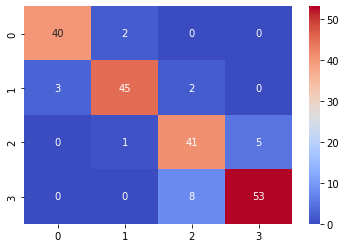

In [ ]:
import seaborn as sns

cm = confusion_matrix(test,pred)

sns.heatmap(cm,annot=True,cmap='coolwarm')